<a href="https://colab.research.google.com/github/Ahmed-2026/DS-4002.fall/blob/main/hotdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_excel('Is hotdog a sandwich_ (Responses).xlsx')


In [2]:
# Clean up and rename columns for simplicity
df.columns = df.columns.str.strip().str.lower()
df = df.rename(columns={
    'what year are you in?': 'year',
    'is hotdog a sandwich?': 'is_hotdog_sandwich'
})

# Keep only the columns needed
df = df[['year', 'is_hotdog_sandwich']]


In [3]:
# Standardize 'year' (should be 1, 2, 3, 4)
df['year'] = df['year'].astype(str).str.extract('(\\d+)')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Standardize Yes/No responses and remove any stray spaces/unicode
df['is_hotdog_sandwich'] = df['is_hotdog_sandwich'].astype(str).str.strip().str.capitalize()

# Drop missing data
df.dropna(inplace=True)


In [4]:
df.to_csv('cleaned_hotdog_survey.csv', index=False)
print(df.head())


   year is_hotdog_sandwich
0     4                Yes
1     3                Yes
2     4                Yes
3     3                Yes
4     1                 No


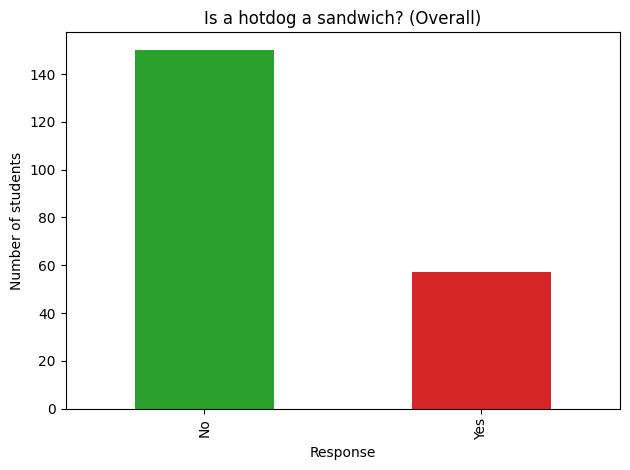

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_hotdog_survey.csv')
df['is_hotdog_sandwich'].value_counts().plot(kind='bar', color=['#2ca02c','#d62728'])
plt.title('Is a hotdog a sandwich? (Overall)')
plt.xlabel('Response')
plt.ylabel('Number of students')
plt.tight_layout()
plt.show()


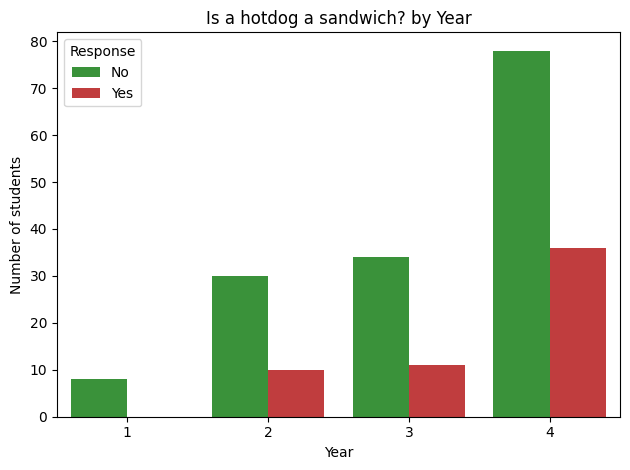

In [6]:
import seaborn as sns

sns.countplot(data=df, x='year', hue='is_hotdog_sandwich', palette=['#2ca02c','#d62728'])
plt.title('Is a hotdog a sandwich? by Year')
plt.xlabel('Year')
plt.ylabel('Number of students')
plt.legend(title='Response')
plt.tight_layout()
plt.show()
